<a href="https://colab.research.google.com/github/Aleksei-Ia/HSE_University/blob/main/Python%20homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1. 45 баллов
Вам предлагается проанализировать датасет с Data - вакансиями. Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью pd.read_csv.

0. Выведите первые 5 и последние 5 строк датасета. Примените к датасету методы info и describe **(1)**


In [ ]:
import pandas as pd
value = pd.read_csv('vacancies.csv')
print('Первые пять строк', value.head(), 'Последние пять строк', value.tail(), sep='\n\n')
print('\n\nМетод info')
value.info()
print('\n\nМетод describe\n', value.describe())

Первые пять строк

   Unnamed: 0                                      position_name  \
0           0                               Data Scientist Авито   
1           1                                       Data analyst   
2           2                         Data Engineer/Data Analyst   
3           3                      Стажер в направление Big Data   
4           4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опы

1. Сколько в датасете строк и столбцов? **(1)**

In [ ]:
print('Количество строк:', len(value), '\nКоличество столбцов:', len(value.columns))

Количество строк: 1527 
Количество столбцов: 12


2. Есть ли в датасете пропуски? **(1)**

In [ ]:
print(f'Количество пропусков:{value.isnull().sum().sum()}' if value.isnull().any().any() else 'Пропусков нет')

Количество пропусков:1307


3. Есть в датасете полные дубли? Если да, удалите их (метод drop_duplicates). **(1)**

In [ ]:
print(f'Количество дубликатов:{value.duplicated().sum()}' if value.duplicated().any() else 'Дубликатов нет')
value.drop_duplicates(inplace=True)

Дубликатов нет


4. Сколько уникальных значений у переменной professional_roles? **(1)**

In [ ]:
print('Уникальных значений переменной professional_roles:', len(value['professional_roles'].unique()))

Уникальных значений переменной professional_roles: 36


5. Сколько в датасете вакансий, не требующих опыта? (**2**)

In [ ]:
print('Вакансий не требующих опыта:', len(value[value['experience'] == 'Нет опыта']))

Вакансий не требующих опыта: 136


6. Какое среднее количество навыков в вакансии? (переменная key_skills) **(2)**

In [ ]:
print('Среднее количество навыков в вакансии:',value['key_skills'].str.split(', ').apply(len).mean())

Среднее количество навыков в вакансии: 4.276358873608382


7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency.  **(2)**
*Подсказка. Как вариант, можете воспользоваться функцией eval, которая исполняет код, написанный в строке. Для проверки на NaN можете использовать pd.isnull()*

In [ ]:
value['currency'] = value['salary'].apply(lambda i: eval(i)['currency'] if not pd.isnull(i) else None)
print(f"Валюты для зарплаты: {', '.join(value['currency'].dropna().unique())}")
#print(value)

Валюты для зарплаты: RUR, KZT, UZS, USD, EUR, BYR


8. Какая компания лидирует по количеству вакансий? **(2)**

In [ ]:
print('Лидирует по количеству вакансий:', value['employer_name'].value_counts().idxmax())

Лидирует по количеству вакансий: СБЕР


9.  Какая компания лидирует по количеству вакансий с указанием заработной платы? **(2)**

In [ ]:
print('Лидирует по количеству вакансий с указанием заработной платы:', value[value['salary'].notnull()]['employer_name'].value_counts().idxmax())

Лидирует по количеству вакансий с указанием заработной платы: Aston


10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to. Если указано только одно из значений (from или to, используйте его) **(2)**

In [ ]:
def salary_num(salary):
    if pd.notna(salary):
        a = eval(salary)
        salary_from = a.get('from')
        salary_to = a.get('to')
        if isinstance(salary_from, (int, float)) and isinstance(salary_to, (int,float)):
            return (salary_from + salary_to) / 2
        elif isinstance(salary_from, (int, float)):
            return salary_from
        elif isinstance(salary_to, (int, float)):
            return salary_to
    return None
value['salary_num'] = value['salary'].apply(salary_num)
#print(value['salary_num'].head(30), value['salary'].head(30))

11. Какая средняя заработная плата среди вакансий в рублях? А медианная заработная плата?  **(2)**

In [ ]:
print('Средняя заработная плата среди вакансий в рублях:', value[value['currency'] == 'RUR']['salary_num'].mean(), '\nМедианная заработная плата среди вакансий в рублях:', value[value['currency'] == 'RUR']['salary_num'].median())

Средняя заработная плата среди вакансий в рублях: 212395.02762430938 
Медианная заработная плата среди вакансий в рублях: 200000.0


12. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре, а также вхождения подстроки python.).  Какой процент вакансий требует знания python? **(3)**

In [ ]:
value['is_python_requirement'] = value['key_skills'].apply(lambda i: 1 if pd.notna(i) and 'python' in i.lower() else 0)
print('Требуют знания python', value['is_python_requirement'].mean() * 100, 'процент вакансий')

Требуют знания python 41.45383104125737 процент вакансий


13. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement (сразу по четырем столбцам). Найдите по каждой группе:
- количество опубликованных вакансий
- количество компаний, которые опубликовали вакансии
- среднюю заработную плату среди вакансий с указанием зарплаты в рублях
 **(3)**

In [ ]:
group = value.groupby(['experience', 'schedule', 'employment', 'is_python_requirement']).agg(
    vacancies=('position_name', 'count'),
    companies=('employer_name', 'nunique'),
    avgsalory=('salary_num', lambda i: i[value['currency'] == 'RUR'].mean())
)
print(group)

                                                                               vacancies  \
experience         schedule         employment          is_python_requirement              
Более 6 лет        Гибкий график    Полная занятость    0                              4   
                                    Частичная занятость 0                              1   
                   Полный день      Полная занятость    0                             49   
                                                        1                             10   
                   Удаленная работа Полная занятость    0                             11   
                                                        1                             12   
Нет опыта          Гибкий график    Полная занятость    1                              2   
                                    Стажировка          1                              3   
                   Полный день      Полная занятость    0                       

14. Создайте столбец count_skills. В нём должна быть длина списка, который находит в столбце key_skills. Обратите внимание, что изначально столбец key_skills - строка, например, '[]' Подумайте, как превратить её в список и посчитать его длину.  **(3)**

In [ ]:
value['count_skills'] = value['key_skills'].fillna('[]').apply(lambda i: len(eval(i)))
print(value['count_skills'])

0        0
1        0
2       11
3        0
4        2
        ..
1522    19
1523     0
1524     0
1525     9
1526     9
Name: count_skills, Length: 1527, dtype: int64


15. Создайте столбец len_descr, в котором должна быть длина описания (description) в символах без учета html тегов ("<...>"). Напишите для этого функцию get_len_descr.  **(3)** Можете использовать регулярные выражения.
То есть, ваш код может выглядеть, например, так:

In [ ]:
import re

def get_len_descr(descr):
  clean_descr = re.sub(r'<[^>]*>', '', descr)
  len_descr = len(clean_descr)
  return len_descr

value['len_descr'] = value['description'].apply(lambda i: get_len_descr(i))
print(value['len_descr'])

0       1583
1       1310
2       3760
3       1188
4       3355
        ... 
1522    4404
1523    3113
1524    2605
1525    3192
1526    3124
Name: len_descr, Length: 1527, dtype: int64


16. Постройте таблицу корреляций с тремя переменными: salary_num, len_descr, count_skills.  **(1)**

In [ ]:
print(value[['salary_num', 'len_descr', 'count_skills']].corr())

              salary_num  len_descr  count_skills
salary_num      1.000000   0.001213     -0.011834
len_descr       0.001213   1.000000      0.126813
count_skills   -0.011834   0.126813      1.000000


17. Постройте тепловую карту из таблицы из предыдущего пункта.  **(1)**

<Axes: >

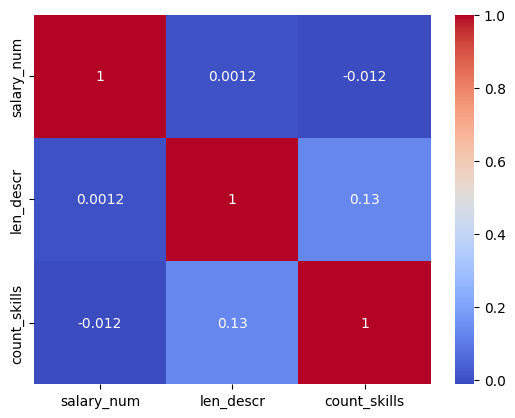

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(value[['salary_num', 'len_descr', 'count_skills']].corr(), annot=True, cmap='coolwarm')
#plt.show()#Для colab не обязательно

18. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов. **(3)**

In [ ]:
print('Топ-10 требуемых скиллов:')
print(value['key_skills'].str.strip('[]').str.split(', ').explode().loc[lambda i: i.str.len() > 0].value_counts().head(10))

Топ-10 требуемых скиллов:
key_skills
'Python'                   633
'SQL'                      574
'ETL'                      154
'Big Data'                 146
'Hadoop'                   118
'PostgreSQL'               113
'DWH'                      111
'Clickhouse'               102
'Английский язык'           93
'Математический анализ'     90
Name: count, dtype: int64


19. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  **(3)**

Text(0.5, 1.0, 'Распределение зарплаты')

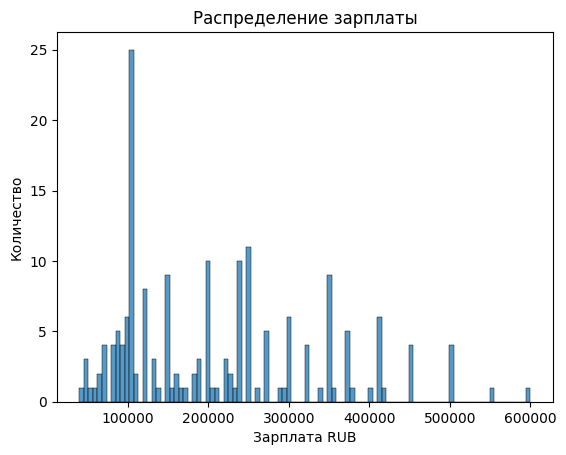

In [ ]:
sns.histplot(value[value['currency'] == 'RUR']['salary_num'].dropna(), bins=100)
plt.xlabel('Зарплата RUB')
plt.ylabel('Количество')
plt.title('Распределение зарплаты')
#plt.show()#Для colab не обязательно

20. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience **(3)**

Text(0.5, 1.0, 'Распределение зарплаты отностительно опыта работы')

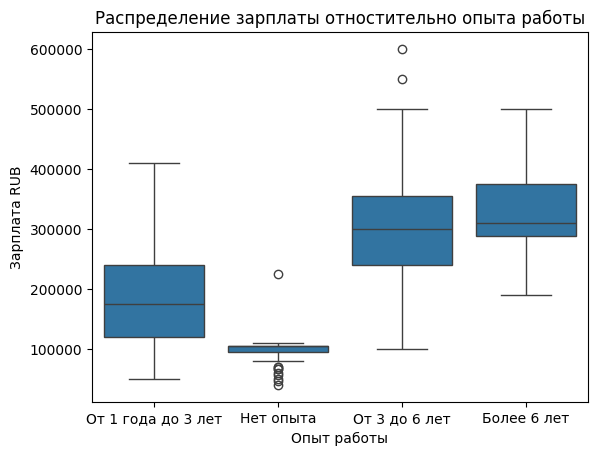

In [ ]:
sns.boxplot(x='experience', y='salary_num', data=value[value['currency'] == 'RUR'])
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата RUB')
plt.title('Распределение зарплаты отностительно опыта работы')
#plt.show()#Для colab не обязательно

21. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

Text(0.5, 1.0, 'Распределение зарплаты отностительно должностей')

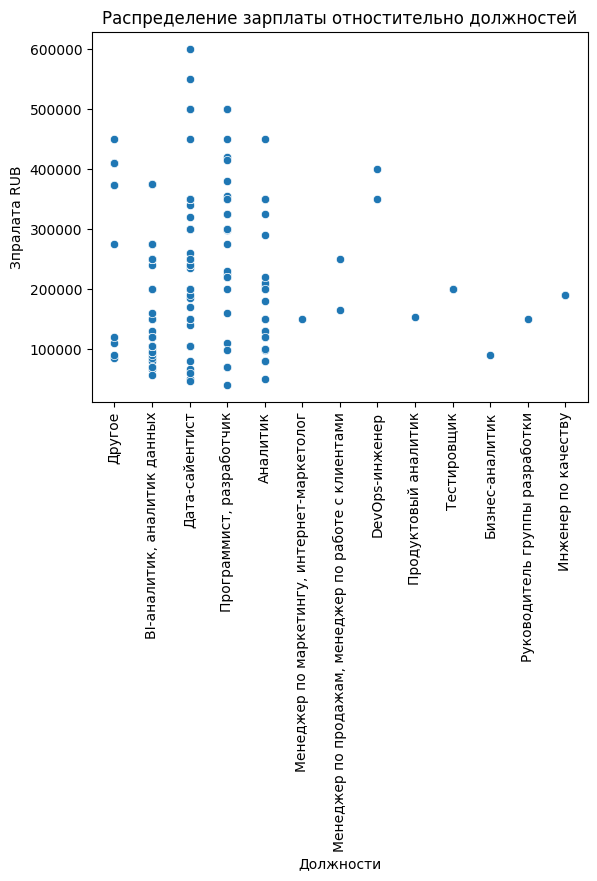

In [ ]:
sns.scatterplot(x='professional_roles', y='salary_num', data=value[value['currency'] == 'RUR'])
plt.xlabel('Должности')
plt.xticks(rotation=90)
plt.ylabel('Зпралата RUB')
plt.title('Распределение зарплаты отностительно должностей')
#plt.show()#Для colab не обязательно

## Задача 2. 55 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 30 баллов

In [ ]:
import pandas as pd
data = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [ ]:
print('Первые пять строк', data.head(), 'Последние пять строк', data.tail(), sep='\n\n')

Первые пять строк

             metro  price   way  views                     provider  \
0      Planernaia   45000  walk    513  realtor                       
1           VDNKh   50000  walk    389  realtor                       
2   Alekseevskaia   50000  walk    483  realtor                       
3        Sviblovo   38000  walk    414  realtor                       
4        Rimskaia   55999  walk    360  realtor                       

   fee_percent  storey  minutes  storeys  living_area  kitchen_area  \
0           50       7       10       12           19             8   
1           50      16       10       16           18             8   
2           50       5        3       12           19             5   
3           50       3       15        5           37            37   
4           99       6        7       17           21            10   

   total_area  
0          38  
1          41  
2          33  
3          37  
4          40  

Последние пять строк

        

2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [ ]:
print(data.describe())

               price        views  fee_percent       storey      minutes  \
count    1446.000000  1446.000000  1446.000000  1446.000000  1446.000000   
mean    43770.738589   417.917012    37.949516     7.089903     8.753804   
std     33232.151532   936.532913    26.893347    16.511552     4.710759   
min     14000.000000     4.000000     0.000000     1.000000     0.000000   
25%     29000.000000    38.000000     0.000000     4.000000     5.000000   
50%     38000.000000   103.000000    50.000000     6.000000     7.000000   
75%     45000.000000   414.000000    50.000000     9.000000    12.000000   
max    500000.000000  5174.000000   100.000000   613.000000    47.000000   

            storeys  living_area  kitchen_area   total_area  
count   1446.000000  1446.000000   1446.000000  1446.000000  
mean      22.545643    20.585754     11.369986    37.265560  
std      347.279854     5.608993      8.083777     6.143386  
min        1.000000     6.000000      3.000000     1.000000  
25%  

3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [ ]:
print(data.describe(include=['object']))
print('Уникальных значений переменной metro:', data['metro'].nunique())

               metro   way                     provider
count           1446  1446                         1446
unique           119     2                            7
top      Planernaia   walk  realtor                    
freq             126  1331                          615
Уникальных значений переменной metro: 119


4. Есть ли в датасете пропуски? (**1**)

In [ ]:
print(f'Количество пропусков:{data.isnull().sum().sum()}' if data.isnull().any().any() else 'Пропусков нет')

Пропусков нет


5. Есть ли в датасете полные дубликаты? (**2**)

In [ ]:
print(f'Количество дубликатов:{data.duplicated().sum()}' if data.duplicated().any() else 'Дубликатов нет')

Количество дубликатов:1201


6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**3**)

> Ответ текстом: Лишние пробелы и \xa0, следует внести измнения в строку удалив данные символы и приведя значения к единому виду, для удобства работы дополнительно рекомендую привести значения к одному регистру и с разрешения привести к одному языку(для удобства работы разных людей(у меня, например, только английская раскладка - пишу слепой печатью-допускаю ошибки).replace({'застройщик': 'developer'})

In [ ]:
print('Уникальных значений переменной provider:', data['provider'].nunique())
print('Значения', data['provider'].value_counts())
print('Уникальные значения переменной provider:', data['provider'].unique())
data['provider'] = data['provider'].str.replace('\xa0', '', regex=True).str.strip().str.lower()#.replace({'застройщик': 'developer'})
print(data['provider'].value_counts())
print('Уникальные значения переменной provider:', data['provider'].unique())


Уникальных значений переменной provider: 4
Значения provider
realtor       1030
owner          238
agency         110
застройщик      68
Name: count, dtype: int64
Уникальные значения переменной provider: ['realtor' 'owner' 'agency' 'застройщик']
provider
realtor       1030
owner          238
agency         110
застройщик      68
Name: count, dtype: int64
Уникальные значения переменной provider: ['realtor' 'owner' 'agency' 'застройщик']


7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**2**)

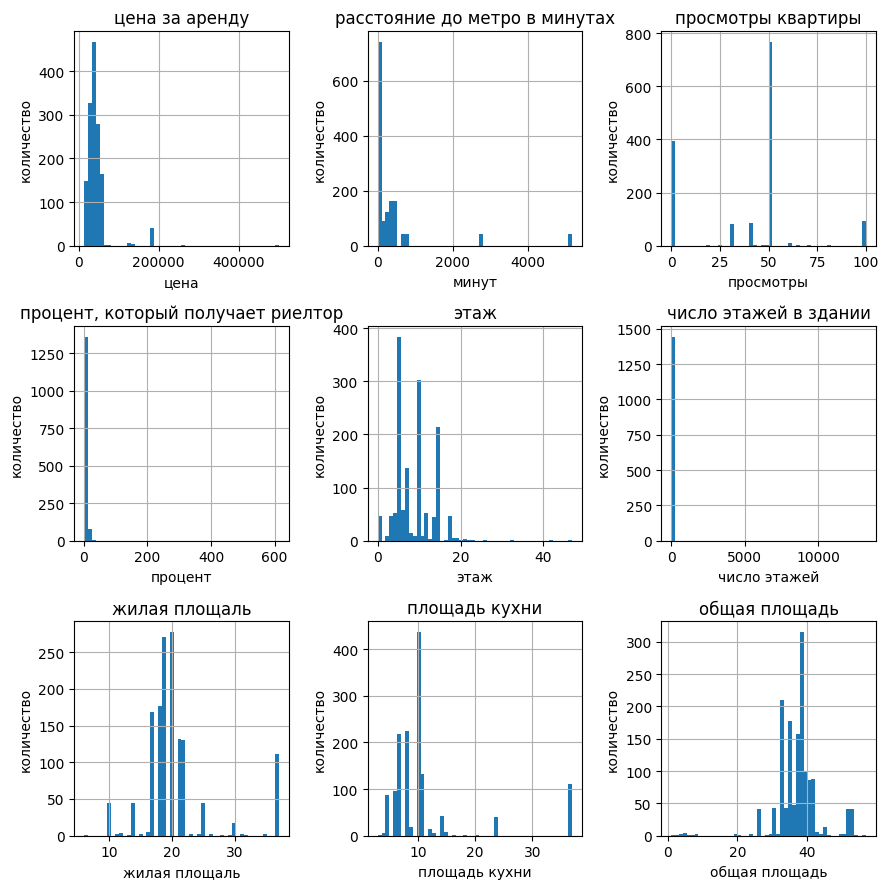

In [ ]:
data.hist(figsize=(9, 9), bins=50)
titles = ['цена за аренду', 'расстояние до метро в минутах', 'просмотры квартиры', 'процент, который получает риелтор', 'этаж', 'число этажей в здании', 'жилая площаль', 'площадь кухни', 'общая площадь']
names = ['цена', 'минут', 'просмотры', 'процент', 'этаж', 'число этажей', 'жилая площаль', 'площадь кухни', 'общая площадь']
for i in range(len(titles)):
    plt.subplot(3, 3, i + 1)
    plt.xlabel(names[i])
    plt.ylabel('количество')
    plt.title(titles[i])
plt.tight_layout()
#plt.show()#Для colab не обязательно

 8. Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot. Нариcуйте с её помощью не менее трёх scatterplot. (**4**)

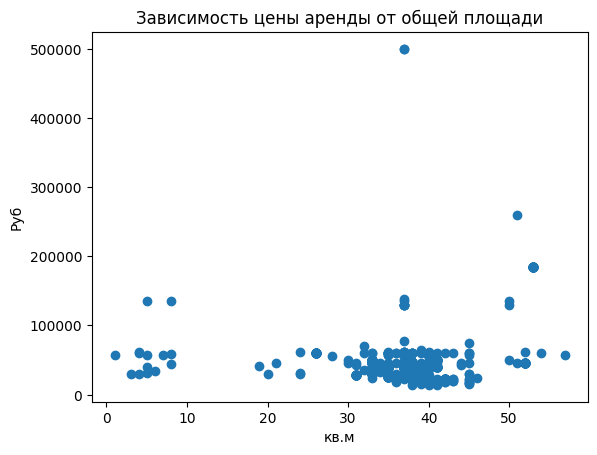

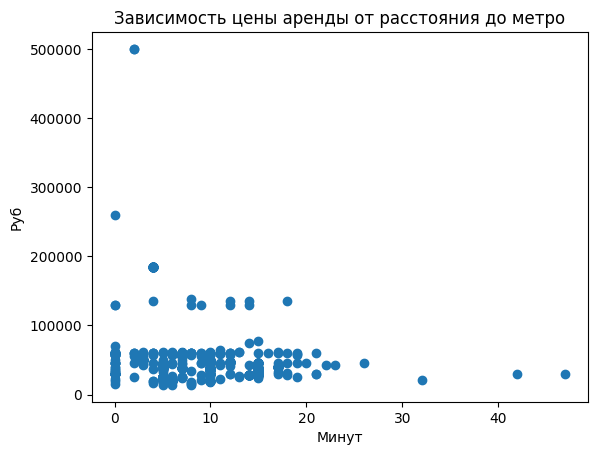

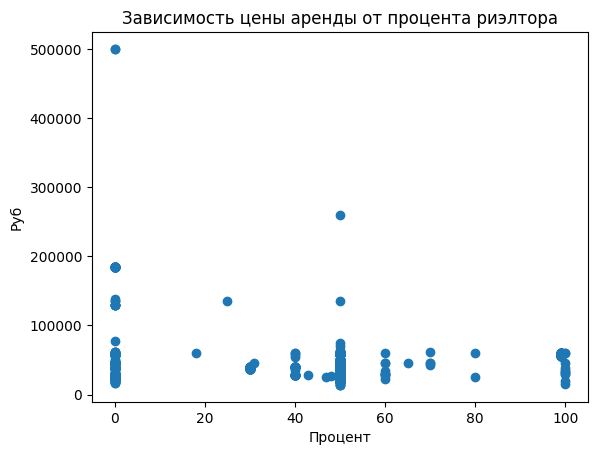

In [ ]:
def plot_scatter(data, x, y, title, xlabel, ylabel):
    plt.scatter(data[x], data[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
plot_scatter(data, 'total_area', 'price', 'Зависимость цены аренды от общей площади', 'кв.м', 'Руб')
plot_scatter(data, 'minutes', 'price', 'Зависимость цены аренды от расстояния до метро', 'Минут', 'Руб')
plot_scatter(data, 'fee_percent', 'price', 'Зависимость цены аренды от процента риэлтора', 'Процент', 'Руб')

9. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

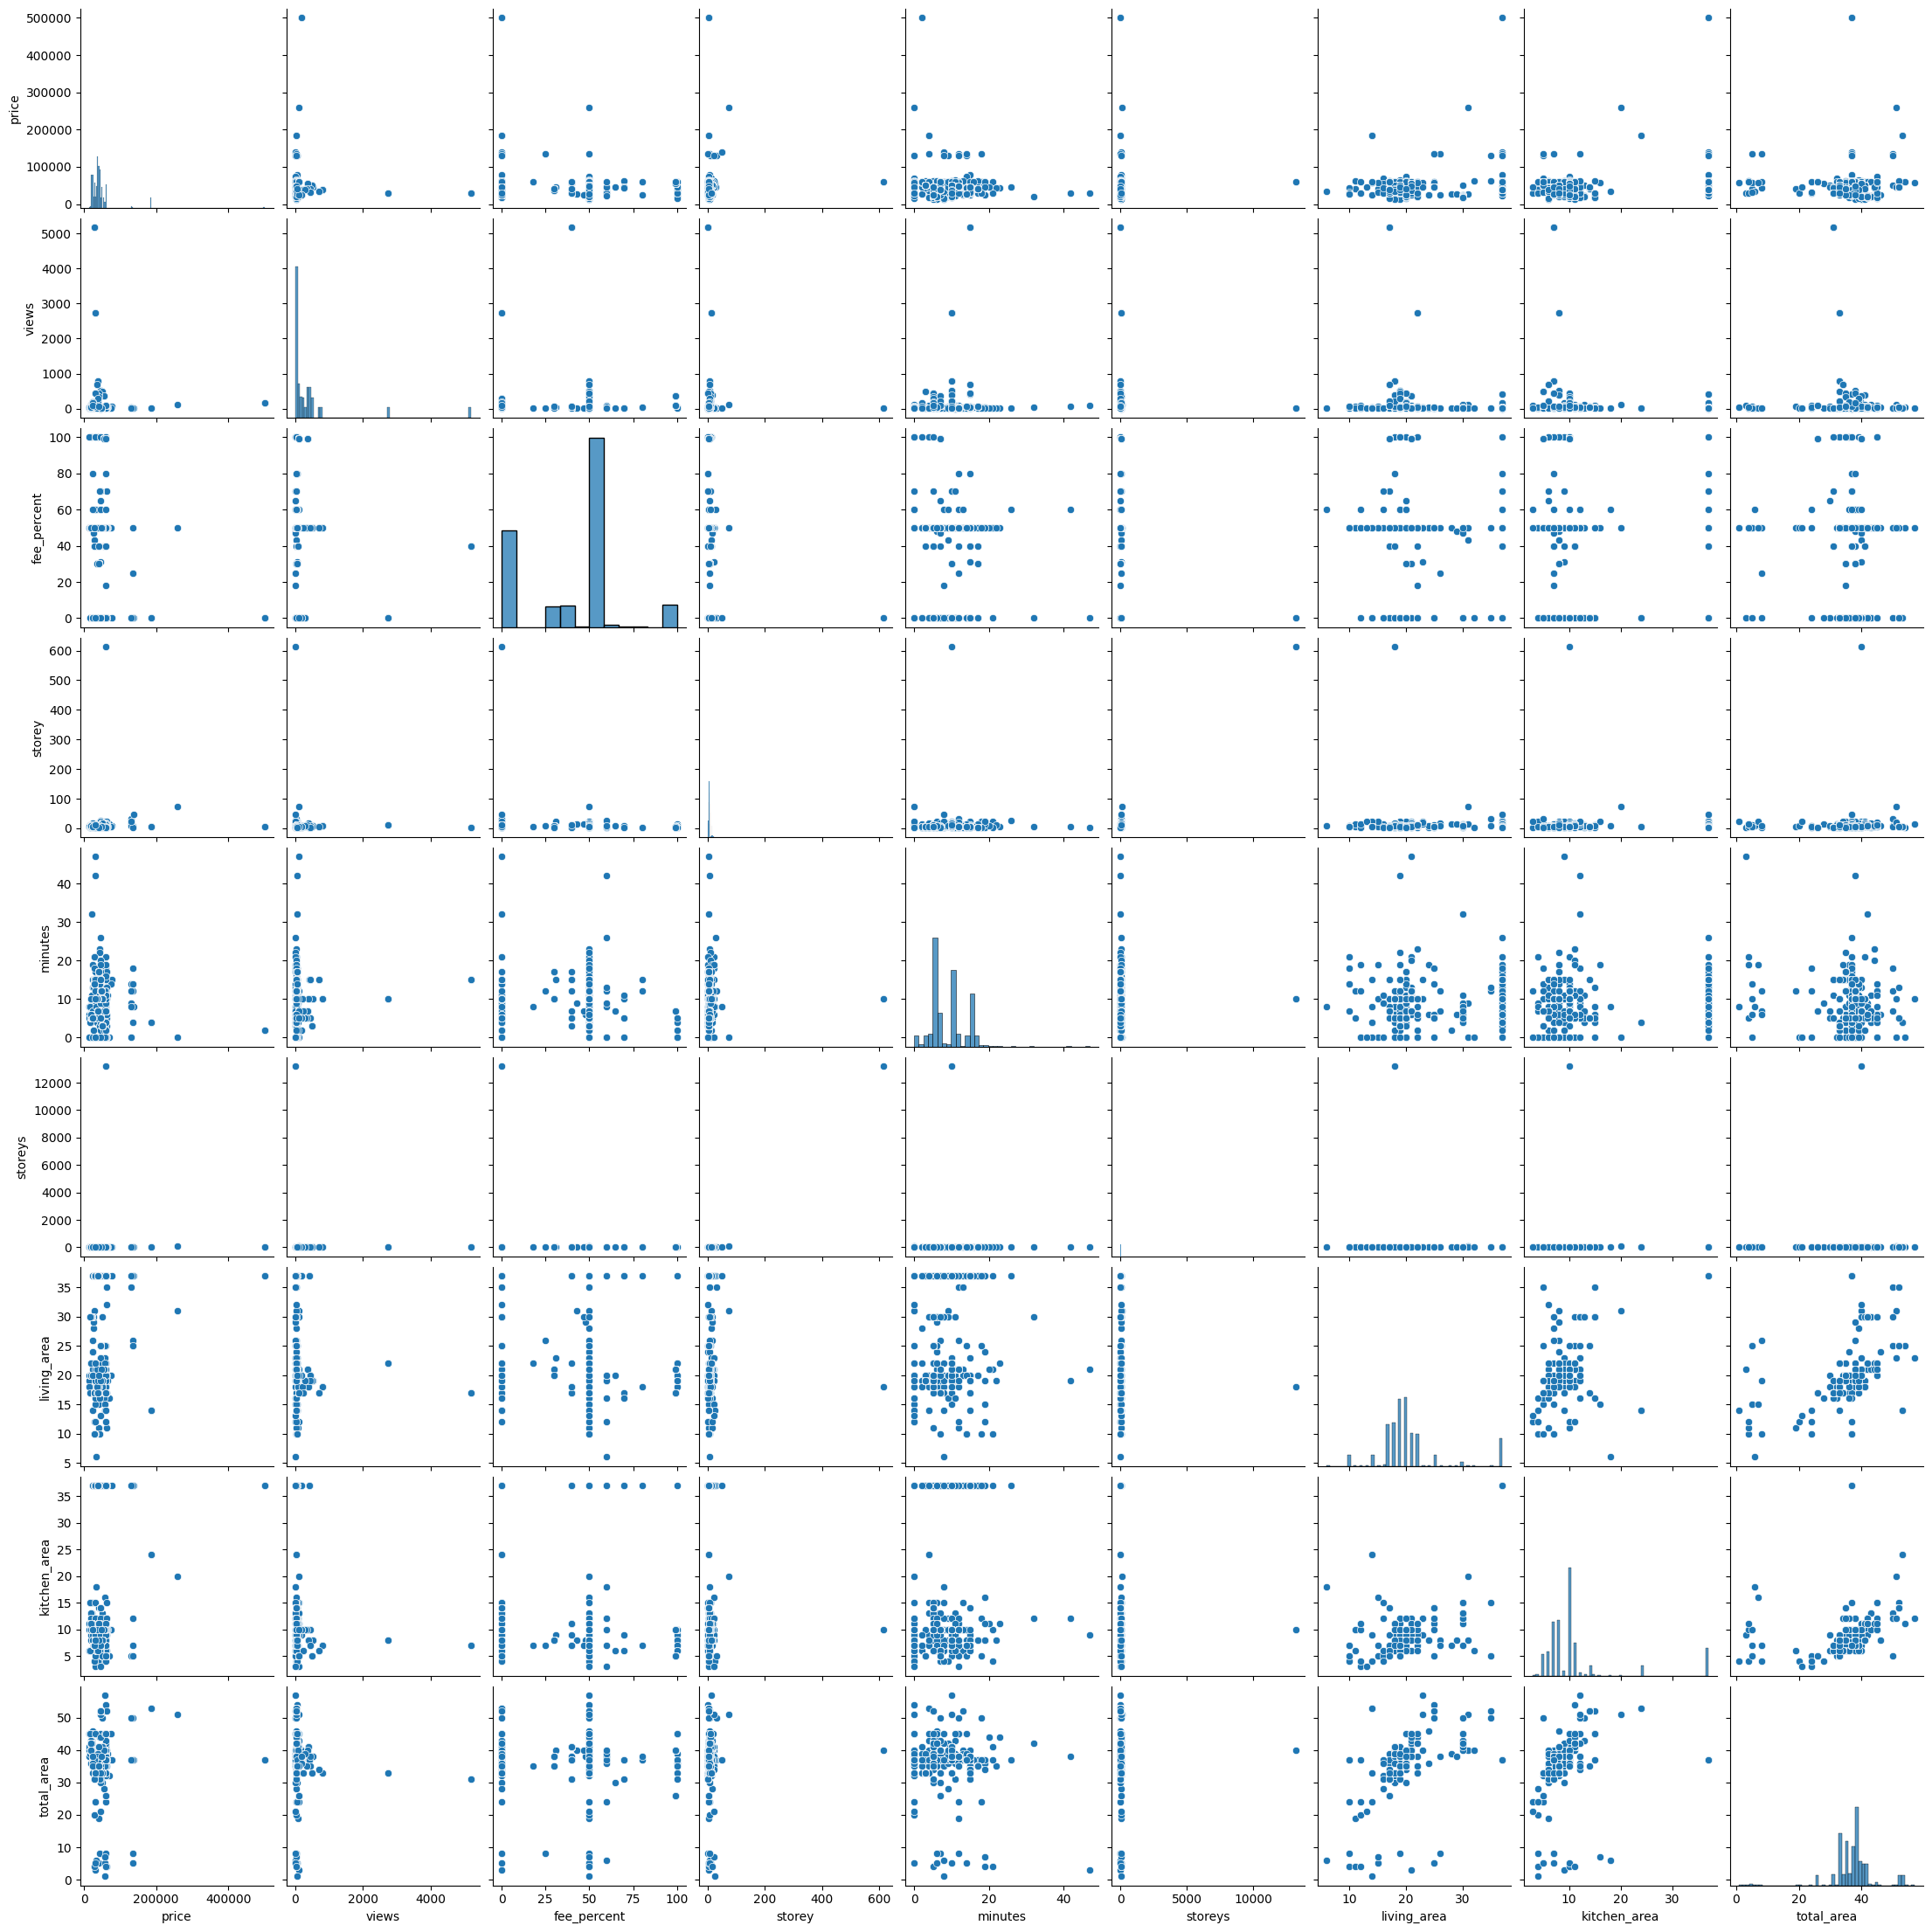

In [ ]:
sns.pairplot(data)
#plt.show()#Для colab не обязательно

10. Нарисуйте boxplot переменной price. (**2**)

Text(0.5, 0, 'Цена')

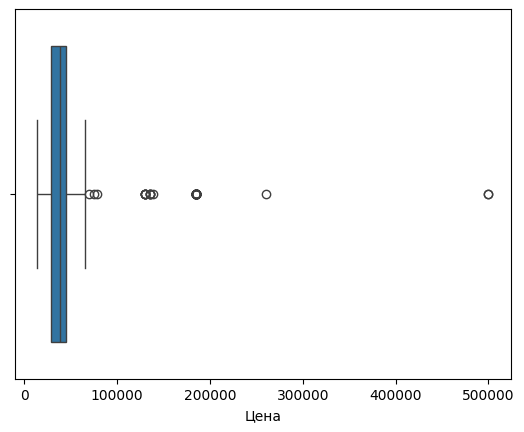

In [ ]:
sns.boxplot(x=data['price'])
plt.xlabel('Цена')
#plt.show()#Для colab не обязательно

11. Нарисуйте еще какой-нибудь график, который считайте нужным. (**2**)

Text(0.5, 1.0, 'Распределение квартир по высоте зданий')

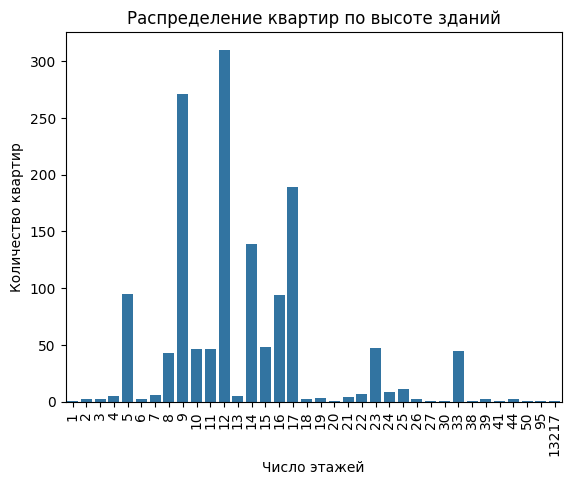

In [ ]:
sns.countplot(x='storeys', data=data)
plt.xticks(rotation=90)
plt.xlabel('Число этажей')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по высоте зданий')

12. Какие выводы можно сделать из визуализаций 7-12? (**2**)

> Ответ текстом: В датасете присутствуют выбросы особенно заметные в переменных storeys и price

13. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**3**)

                 price     views  fee_percent    storey   minutes   storeys  \
price         1.000000 -0.120809    -0.115895  0.027764 -0.171879  0.015654   
views        -0.120809  1.000000    -0.039790 -0.026814  0.247020 -0.014884   
fee_percent  -0.115895 -0.039790     1.000000 -0.039812  0.094115 -0.034967   
storey        0.027764 -0.026814    -0.039812  1.000000 -0.032928  0.967711   
minutes      -0.171879  0.247020     0.094115 -0.032928  1.000000  0.001864   
storeys       0.015654 -0.014884    -0.034967  0.967711  0.001864  1.000000   
living_area   0.005778 -0.101520    -0.107158  0.000485 -0.004648 -0.011504   
kitchen_area  0.336511 -0.152155    -0.157209 -0.013906 -0.034461 -0.005318   
total_area    0.274565 -0.250220    -0.234524  0.029073 -0.244880  0.009851   

              living_area  kitchen_area  total_area  
price            0.005778      0.336511    0.274565  
views           -0.101520     -0.152155   -0.250220  
fee_percent     -0.107158     -0.157209   -0.23

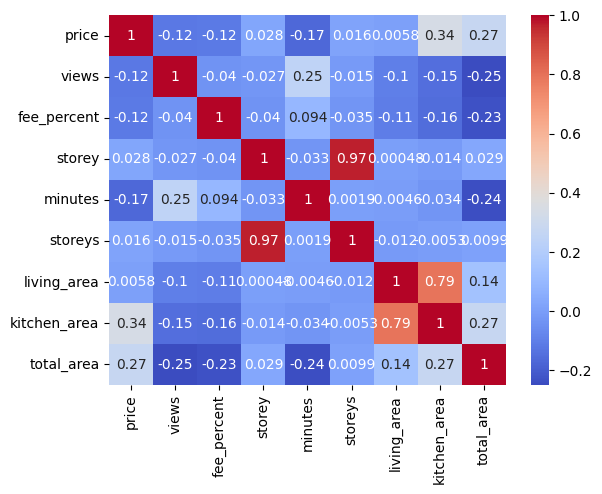

In [ ]:
matrix=data.corr(numeric_only=True)
print(matrix)
sns.heatmap(matrix, annot=True, cmap='coolwarm')
#plt.show()#Для colab не обязательно
print('Из тепловой карты виден высокий уровень линейной связи между storeys - storey и living_area - kitchen area')

Из тепловой карты виден высокий уровень линейной связи  между storeys - storey и living_area - kitchen area

#### Часть 2. Построение модели. 30 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
import numpy as np
x = data.select_dtypes(include=[np.number]).drop(columns=['price'])
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression().fit(x_train, y_train)

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [ ]:
test_pred = model.predict(x_test)
print('MSE:', MSE(y_test, test_pred))
print('RMSE:', RMSE(y_test, test_pred))

MSE: 768307363118.6447
RMSE: 876531.4387508554


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [ ]:
additional = ['way', 'provider']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded1 = encoder.fit_transform(data[additional])
encoded2 = pd.DataFrame(encoded1, columns=encoder.get_feature_names_out(additional))
x = pd.concat([x.reset_index(drop=True), encoded2], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression().fit(x_train, y_train)
test_pred = model.predict(x_test)
print('MSE:', MSE(y_test, test_pred))
print('RMSE:', RMSE(y_test, test_pred))

MSE: 666637180092.6693
RMSE: 816478.5239629205


4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [ ]:
lim = y_train.quantile(0.75) + 1.5 * (y_train.quantile(0.75) - y_train.quantile(0.25))
nolim = y_train <= lim
y_train = y_train[nolim]
x_train = x_train[nolim]
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression().fit(x_train, y_train)
test_pred = model.predict(x_test)
r1=MSE(y_test, test_pred)
r2=RMSE(y_test, test_pred)
print('MSE:',r1)
print('RMSE:',r2)

MSE: 63223163139.74137
RMSE: 251442.16659053304


5. Попробуйте написать свою реализацию функций MSE и RMSE. Функции должна принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**6**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
def MSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse
u1=MSE(y_test, test_pred)
print('MSE:', u1)
print('MSE библиотечной реализации соответствует данной реализации' if r1 == u1 else 'MSE библиотечной реализации отличается от данной реализации')

MSE: 63223163139.74137
MSE библиотечной реализации соответствует данной реализации


In [ ]:
def RMSE(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse
u2=RMSE(y_test, test_pred)
print('RMSE:', u2)
print('RMSE библиотечной реализации соответствует данной реализации' if r2 == u2 else 'RMSE библиотечной реализации отличается от данной реализации')

RMSE: 251442.16659053304
RMSE библиотечной реализации соответствует данной реализации


Значения идентичны

6. Попробуйте улучшить модель, добавив еще какое-нибудь преобразование (например, можете оставить только часть столбцов, добавить новые признаки, закодировать переменную metro и т.п.). Посчитайте метрики. Удалось ли улучшить модель? (**4**)

*Примечание. Любой разумный технически верно проведенный эксперимент
 засчитывается, даже если метрику улучшить не удалось.*

<Axes: >

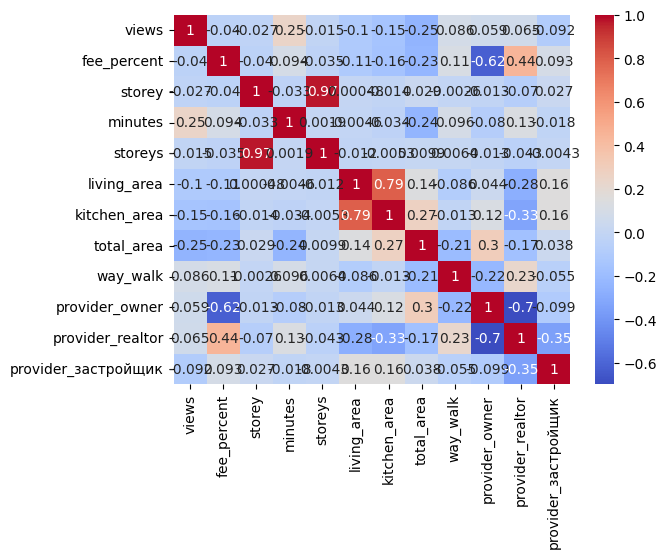

In [ ]:
sns.heatmap(pd.DataFrame(x).corr(), annot=True, cmap='coolwarm')

In [ ]:
from sklearn.pipeline import Pipeline
x_updated = x.drop(columns=['storey'])
x_trainu, x_testu, y_trainu, y_testu = train_test_split(x_updated, y, test_size=0.25, random_state=42)
limu = y_trainu.quantile(0.75) + 1.5 * (y_trainu.quantile(0.75) - y_trainu.quantile(0.25))
nolimu = y_trainu <= limu
y_trainu = y_trainu[nolimu]
x_trainu = x_trainu[nolimu]
pipeline_final = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])
pipeline_final.fit(x_trainu,y_trainu)
test_predu = pipeline_final.predict(x_testu)
print('MSE:', MSE(y_testu, test_predu))
print('RMSE:', RMSE(y_testu, test_predu))

MSE: 910716628.4793514
RMSE: 30178.08192180794
